In [8]:
%matplotlib inline

import math as m
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt

from os import listdir

yellow='#ffb200'
red='#DD5544'
blue='#0284C0'

In [9]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [10]:
def plot_spectra(folder, name):
    with open(folder + '/' + name +'.txt') as f:
        loadfile = f.read()
        data = []
    for lf in loadfile.split('\n')[:-1]:     
        row = [float(j) for j in lf.split('\t')]

        data.append([row[0]] + row[1::2])

    data = np.matrix(data)

    with open(folder + '/' +name +'Log.txt') as f:
        loadfile = f.read()
        columns = [lf[11:-6] for lf in loadfile.split('\n')[:-1]]
        columns = ['wavelength [nm]']+ columns[1::2]
        
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 1, 1])
    axes.grid(linestyle='--')
    axes.set_title(name)
    axes.set_xlabel('$\\lambda$ [nm]')
    axes.set_ylabel('intensity [a. u.]')
    axes.set_ylim([-0.1, 1.2])

    for i in range(1, data.shape[1]):
        axes.plot(data[:,0], data[:,i], linewidth=2, label = columns[i])

    lgd = fig.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

    fig.savefig(folder + '/' + name +'.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')   
    
def plot_folder(folder):
    files = listdir(folder)
    files = [file[:-7] for file in files if 'Log' in file]
    print(files)
    for file in files[:]:
        try:
            plot_spectra(folder, file)
        except:
            print('{} failed'.format(file))

['functionalization', 'sensitivity', 'sensitivity_02', 'sensitivity_03', 'sensitivity_07', 'spectra_pbs', 'spectra_q_01', 'spectra_q_02', 'spectra_q_03', 'spectra_q_04', 'spectra_q_05', 'spectra_q_06', 'spectra_q_07', 'spectra_q_07_2', 'spectra_q_08', 'spectra_q_09', 'spectra_q_10', 'spectra_q_11']
functionalization failed


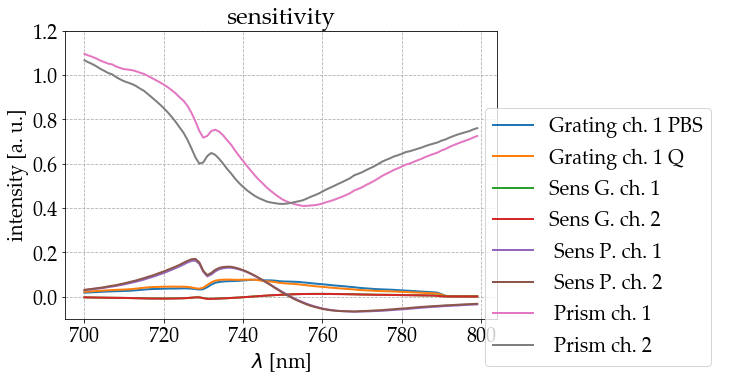

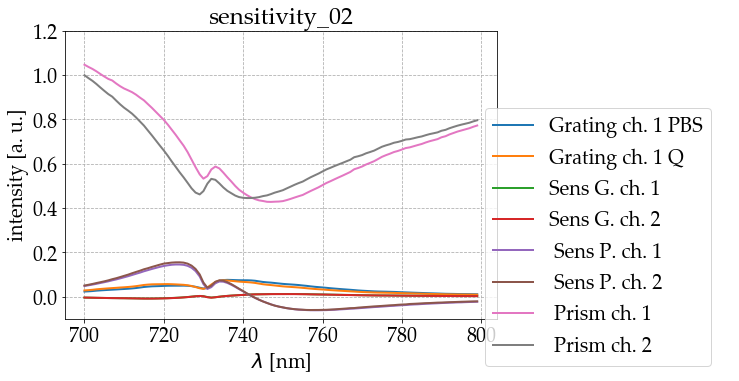

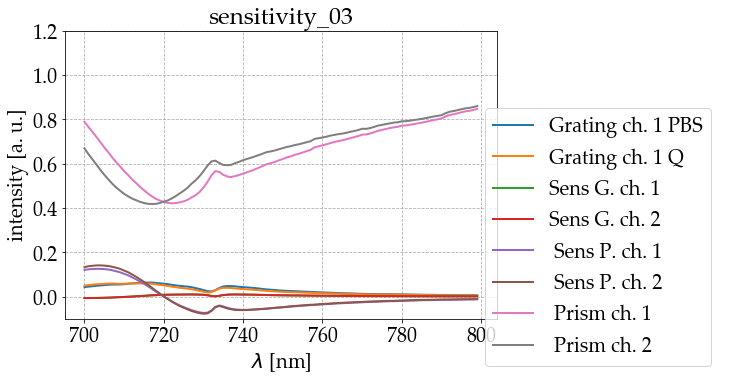

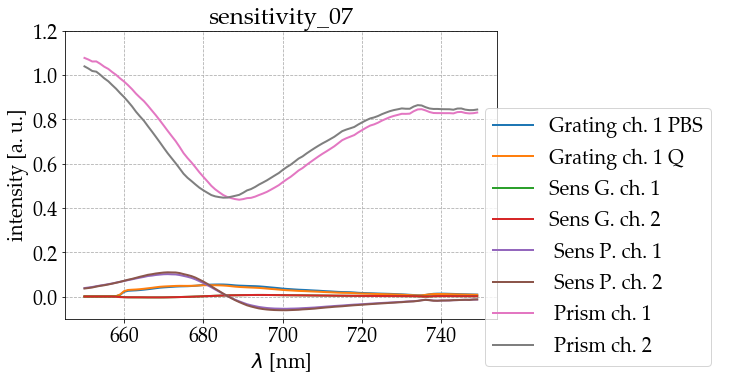

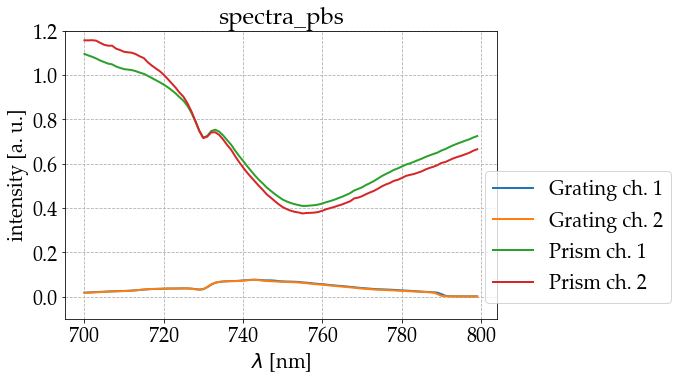

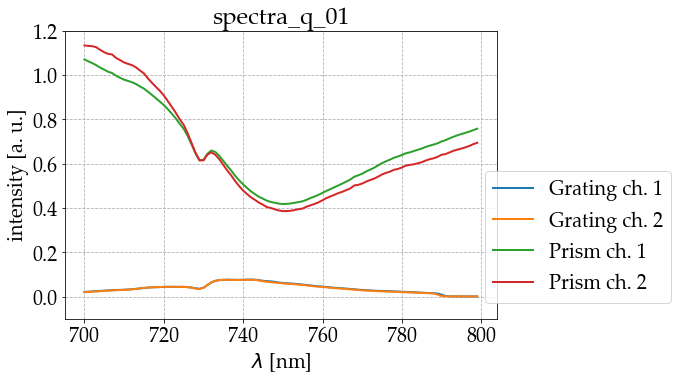

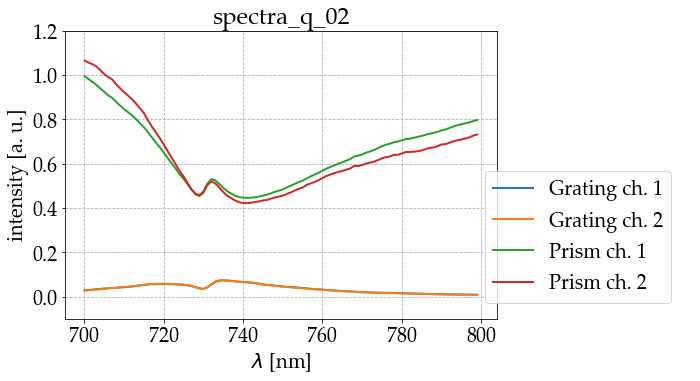

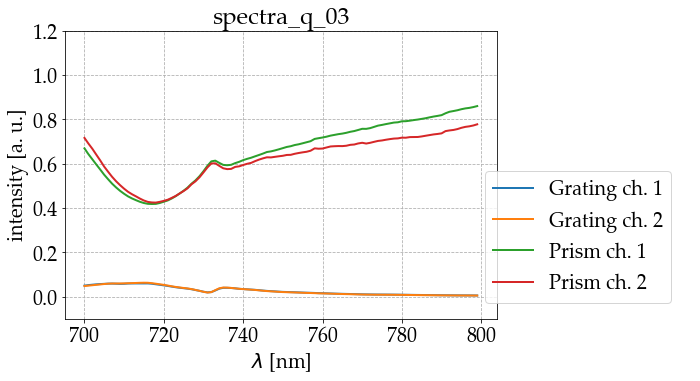

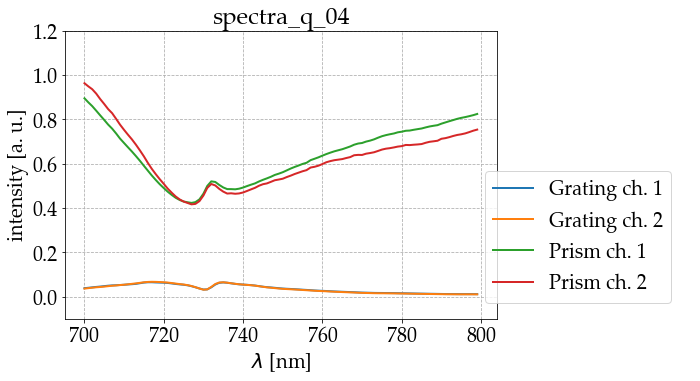

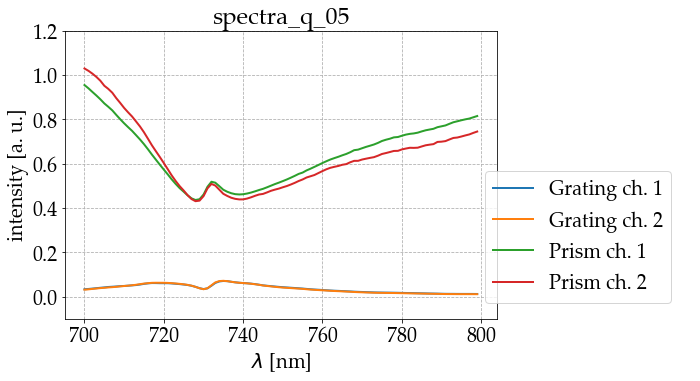

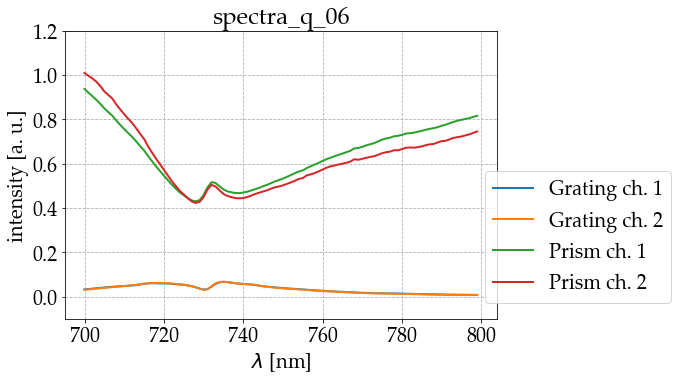

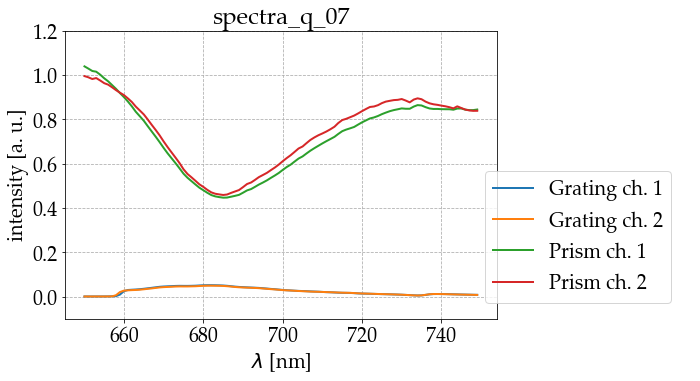

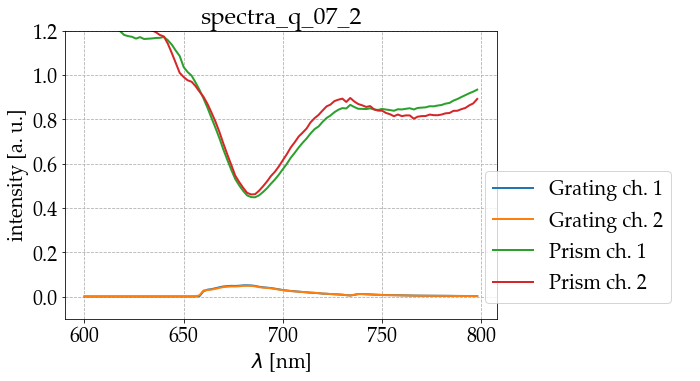

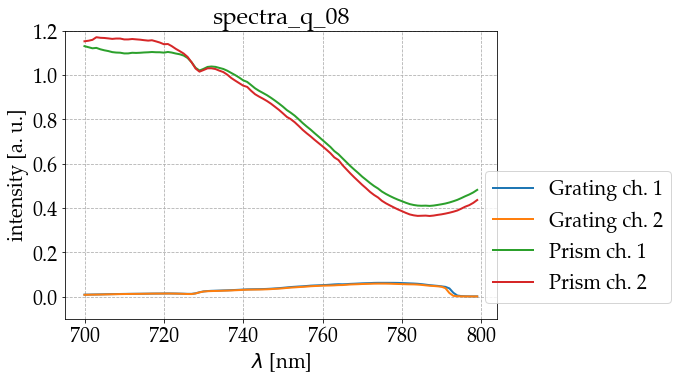

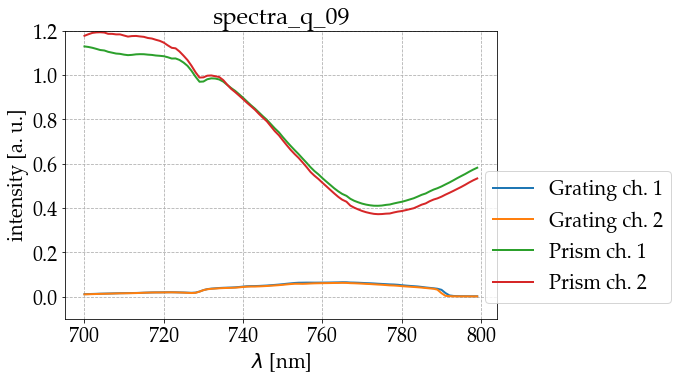

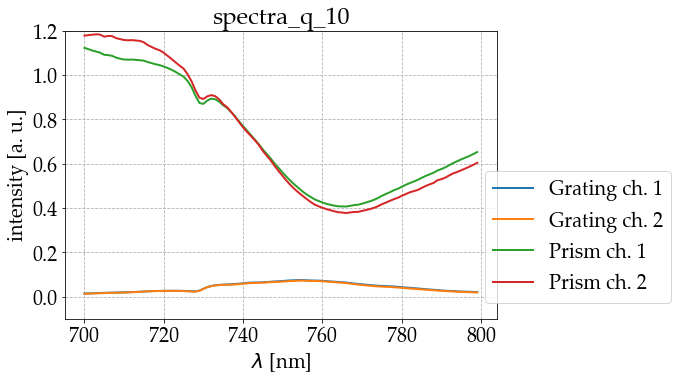

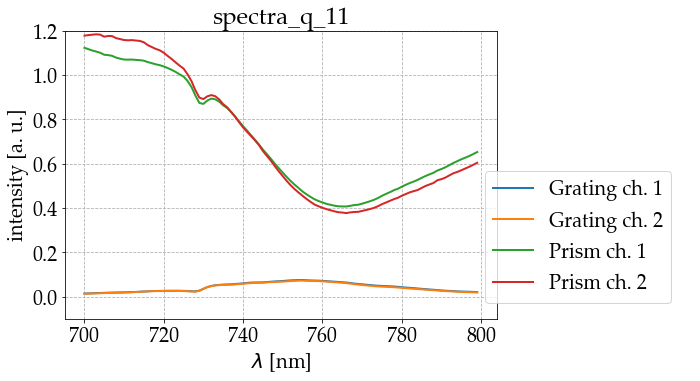

In [12]:
folder = r'C:\SPRUP_data_Jenda\2020_09_25_Jenda_prism_grating\20_10_07_L3'.replace('\\', '/')
plot_folder(folder)